In [1]:
import sys
sys.path.append('C:/Users/Anusha/Documents/GitHub/miniML/core/')
from miniML import MiniTrace, EventDetection
from miniML_plot_functions import miniML_plots
import numpy as np
import re, struct, collections
import datetime
import os, sys
import pyqtgraph as pg
from FileImport.HekaReader import Bundle

In [2]:
filename = 'C:/Users/Anusha/Documents/GitHub/miniML/model_training/extract_training_data/example_recordings/Melina_032224_S3_hippocampus_LAA_NMDA.dat'
rectype = '1minLoop'
group = 1
scaling = 1e12
unit = 'pA'
exclude_series = []
exclude_sweeps = {2:[1,2]}

trace = MiniTrace.from_heka_file(filename=filename,
                            group=group,
                            exclude_series = exclude_series,
                            exclude_sweeps = exclude_sweeps,
                            rectype=rectype,
                            scaling=scaling,
                            unit=unit)
#import numpy as np
#t1, t2 = 0, 41 
#p1, p2 = int(t1/trace.sampling), int(t2/trace.sampling)
#stretch_1 = trace.data[p1:p2]

#t1, t2 = 48, 60 
#p1, p2 = int(t1/trace.sampling), int(t2/trace.sampling)
#stretch_2 = trace.data[p1:p2]

#t1, t2 = 168, 180 
#p1, p2 = int(t1/trace.sampling), int(t2/trace.sampling)
#stretch_3 = trace.data[p1:p2]

#trace.data = np.concatenate((stretch_1, stretch_2))

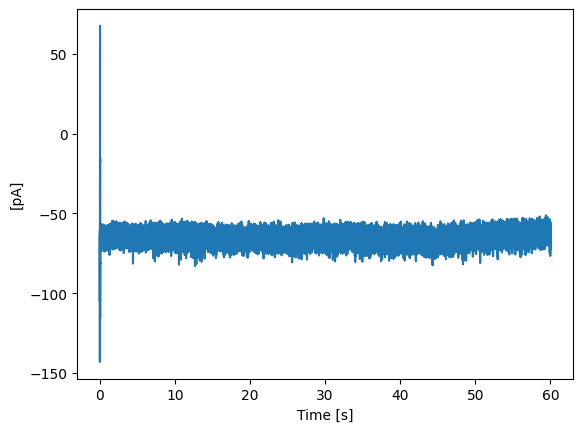

In [3]:
trace.plot_trace()

In [12]:
model = 'C:/Users/Anusha/Documents/GitHub/miniML/model/Model 5/lstm_transfer_5.h5'
win_size = 750
threshold = 0.46
event_direction = 'negative'
training_direction = 'negative'

detection = EventDetection(data=trace,
                           model_path=model,
                           window_size=win_size,
                           model_threshold=threshold,
                           batch_size=512,
                           event_direction=event_direction,
                           training_direction=training_direction,
                           compile_model=True)

Model loaded from C:/Users/Anusha/Documents/GitHub/miniML/model/Model 5/lstm_transfer_5.h5


In [13]:
detection.detect_events(eval=True, convolve_win=5, resample_to_600=True)

47/47 [==============================] - 10s 180ms/step

Event statistics:
-------------------------
    Number of events: 207
    Average score: 0.902
    Event frequency: 3.4473 Hz
    Mean amplitude: -4.4379 pA
    Median amplitude: -4.5497 pA
    Std amplitude: 3.2007 pA
    CV amplitude: 0.721
    Mean charge: -0.02312 pC
    CV charge: 1.435
    Mean 10-90 risetime: 2.047 ms
    Mean half decay time: 0.937 ms
    Tau decay: 9.597 ms
-------------------------


In [14]:
%matplotlib qt
# # Change "inline" to "qt" to make the plot interactive (requires installation of the PyQt library)
MiniPlots = miniML_plots(data=detection)

MiniPlots.plot_prediction(include_data=True, plot_filtered_prediction=True, plot_filtered_trace=True, plot_event_params=False)
#MiniPlots.plot_event_overlay()
#MiniPlots.plot_event_histogram(plot='amplitude', cumulative=False)
#MiniPlots.plot_gradient_search()

In [15]:
detection.save_to_pickle(filename='C:/Users/Anusha/Documents/GitHub/miniML/model_training/extract_training_data/example_recordings/.pickle', 
                         include_prediction=True, 
                         include_data=False)
detection.save_to_h5('C:/Users/Anusha/Documents/GitHub/miniML/model_training/extract_training_data/example_recordings/.h5')
detection.save_to_csv(filename='C:/Users/Anusha/Documents/GitHub/miniML/model_training/extract_training_data/example_recordings/.csv')

events saved to C:/Users/Anusha/Documents/GitHub/miniML/model_training/extract_training_data/example_recordings/Volodymyr data/240628S2VS_stim_qx314_2ml.pickle
Events saved to C:/Users/Anusha/Documents/GitHub/miniML/model_training/extract_training_data/example_recordings/Volodymyr data/240628S2VS_stim_qx314_2ml.h5
events saved to C:/Users/Anusha/Documents/GitHub/miniML/model_training/extract_training_data/example_recordings/Volodymyr data/240628S2VS_stim_qx314_2ml_avgs.csv and C:/Users/Anusha/Documents/GitHub/miniML/model_training/extract_training_data/example_recordings/Volodymyr data/240628S2VS_stim_qx314_2ml_individual.csv
